In [1]:
import pandas as pd
import numpy as np


IMPORTING DATASETS

In [6]:
hist_df = pd.read_csv('/content/historical_data.csv',low_memory=False)
fg_df = pd.read_csv('/content/fear_greed_index.csv',low_memory=False)


In [8]:
hist_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [9]:
fg_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


EXTRACTING INFORMATION

In [11]:
print("Historical Data Info:")
print(hist_df.info())
print("\nFear Greed Index Info:")
print(fg_df.info())

Historical Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dty

FINDING NUMBER OF ROWS AND COLUMNS

In [12]:
print("\nHistorical Data Shape:")
print(hist_df.shape)
print("\nFear Greed Index Shape:")
print(fg_df.shape)



Historical Data Shape:
(211224, 16)

Fear Greed Index Shape:
(2644, 4)


MISSING VALUES AND DUPLICATE VALUES

In [13]:
print("\nHistorical Data Missing Values:")
print(hist_df.isnull().sum())
print("\nFear Greed Index Missing Values:")
print(fg_df.isnull().sum())

print("\nHistorical Data Duplicates:", hist_df.duplicated().sum())
print("Fear Greed Index Duplicates:", fg_df.duplicated().sum())



Historical Data Missing Values:
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

Fear Greed Index Missing Values:
timestamp         0
value             0
classification    0
date              0
dtype: int64

Historical Data Duplicates: 0
Fear Greed Index Duplicates: 0


In [16]:
print("Unique Directions:", hist_df['Direction'].unique())


Unique Directions: ['Buy' 'Sell' 'Open Long' 'Close Long' 'Spot Dust Conversion' 'Open Short'
 'Close Short' 'Long > Short' 'Short > Long' 'Auto-Deleveraging'
 'Liquidated Isolated Short' 'Settlement']


Convert timestamps and align the datasets by date

In [17]:
hist_df['Timestamp IST'] = pd.to_datetime(hist_df['Timestamp IST'], format='%d-%m-%Y %H:%M')
hist_df['Date'] = hist_df['Timestamp IST'].dt.date

fg_df['Date'] = pd.to_datetime(fg_df['date']).dt.date

MERGING DATASETS

In [19]:
merged_df = pd.merge(hist_df, fg_df[['Date', 'value', 'classification']], on='Date', how='inner')

FEATURE ENGINEERING

In [20]:
merged_df['is_win'] = merged_df['Closed PnL'] > 0
merged_df['is_loss'] = merged_df['Closed PnL'] < 0

In [21]:
print("\nDirection value counts:")
print(merged_df['Direction'].value_counts())


Direction value counts:
Direction
Open Long                    49895
Close Long                   48678
Open Short                   39741
Close Short                  36007
Sell                         19902
Buy                          16716
Spot Dust Conversion           142
Short > Long                    70
Long > Short                    57
Auto-Deleveraging                8
Liquidated Isolated Short        1
Settlement                       1
Name: count, dtype: int64


DAILY METRICS

In [ ]:
daily_metrics = merged_df.groupby(['Account', 'Date', 'classification']).agg(
    daily_pnl=('Closed PnL', 'sum'),
    total_trades=('Trade ID', 'count'),
    wins=('is_win', 'sum'),
    losses=('is_loss', 'sum'),
    avg_trade_size=('Size USD', 'mean'),
    total_fee=('Fee', 'sum')
).reset_index()

In [ ]:
daily_metrics['win_rate'] = daily_metrics['wins'] / daily_metrics['total_trades']

In [ ]:
merged_df['is_long'] = merged_df['Direction'].str.contains('Long|Buy', case=False)
merged_df['is_short'] = merged_df['Direction'].str.contains('Short|Sell', case=False)

In [ ]:
ls_counts = merged_df.groupby(['Account', 'Date']).agg(
    long_count=('is_long', 'sum'),
    short_count=('is_short', 'sum')
).reset_index()

In [ ]:
daily_metrics = pd.merge(daily_metrics, ls_counts, on=['Account', 'Date'])
daily_metrics['long_short_ratio'] = daily_metrics['long_count'] / (daily_metrics['short_count'] + 1e-6)

In [ ]:
print("\nDaily Metrics Head:")
print(daily_metrics.head())


Daily Metrics Head:
                                      Account        Date classification  \
0  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-11  Extreme Greed   
1  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-17  Extreme Greed   
2  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-18  Extreme Greed   
3  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-22  Extreme Greed   
4  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-26  Extreme Greed   

   daily_pnl  total_trades  wins  losses  avg_trade_size   total_fee  \
0        0.0           177     0       0     5089.718249  167.796055   
1        0.0            68     0       0     7976.664412   67.883615   
2        0.0            40     0       0    23734.500000   94.937983   
3   -21227.0            12     0      12    28186.666667   33.823995   
4     1603.1            27    12       0    17248.148148  104.622490   

   win_rate  long_count  short_count  long_short_ratio  
0  0.000000           0         

STANDARDIZING THE CLASSIFICATION COLUMN

In [ ]:
sentiment_map = {
    'Extreme Fear': 'Fear',
    'Fear': 'Fear',
    'Neutral': 'Neutral',
    'Greed': 'Greed',
    'Extreme Greed': 'Greed'
}
daily_metrics['sentiment'] = daily_metrics['classification'].map(sentiment_map)

DAILY METRICS BY CLASSIFICATION

In [ ]:
sentiment_performance = daily_metrics.groupby('sentiment').agg(
    avg_pnl=('daily_pnl', 'mean'),
    median_pnl=('daily_pnl', 'median'),
    avg_win_rate=('win_rate', 'mean'),
    avg_trades=('total_trades', 'mean'),
    avg_size=('avg_trade_size', 'mean'),
    avg_ls_ratio=('long_short_ratio', 'mean'),
    total_count=('Account', 'count')
).reset_index()

In [ ]:
print("Sentiment Performance Summary:")
print(sentiment_performance)

Sentiment Performance Summary:
  sentiment      avg_pnl  median_pnl  avg_win_rate  avg_trades     avg_size  \
0      Fear  5185.146443  122.737038      0.357071  105.363291  8529.859802   
1     Greed  4144.208334  265.247725      0.362748   76.912266  5954.632633   
2   Neutral  3438.618818  167.551743      0.355414  100.228723  6963.694861   

   avg_ls_ratio  total_count  
0  4.185190e+07          790  
1  1.469421e+07         1174  
2  3.513830e+07          376  


DAILY METRICS BY ACCOUNT

In [ ]:
account_stats = daily_metrics.groupby('Account').agg(
    total_pnl=('daily_pnl', 'sum'),
    avg_trades_per_day=('total_trades', 'mean'),
    avg_size=('avg_trade_size', 'mean'),
    win_rate=('wins', 'sum'),
    total_trades_count=('total_trades', 'sum')
)

In [ ]:
account_stats['win_rate'] = account_stats['win_rate'] / account_stats['total_trades_count']

ANALYZING SEGMENTS

In [ ]:
account_stats['frequency_segment'] = pd.qcut(account_stats['avg_trades_per_day'], 2, labels=['Infrequent', 'Frequent'])
account_stats['size_segment'] = pd.qcut(account_stats['avg_size'], 2, labels=['Small Size', 'Large Size'])
account_stats['success_segment'] = np.where(account_stats['total_pnl'] > 0, 'Winner', 'Loser')

In [ ]:
daily_metrics = daily_metrics.merge(account_stats[['frequency_segment', 'size_segment', 'success_segment']], on='Account')

/tmp/ipython-input-3534918202.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='daily_pnl', data=daily_metrics, showfliers=False,palette="coolwarm")


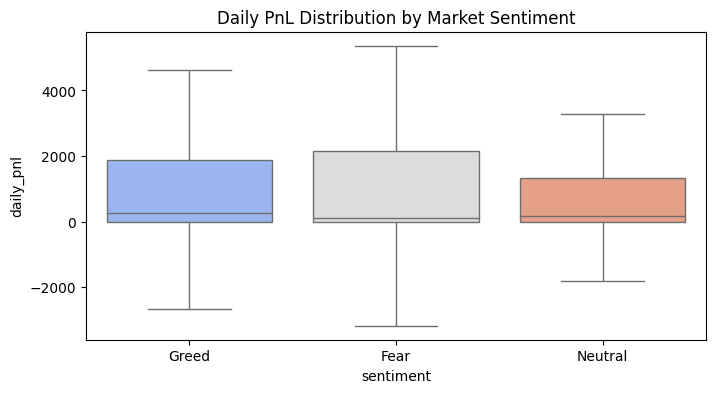

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,4))
sns.boxplot(x='sentiment', y='daily_pnl', data=daily_metrics, showfliers=False,palette="coolwarm")
plt.title('Daily PnL Distribution by Market Sentiment')
plt.savefig('pnl_by_sentiment.png')

The data reveals that Fear days actually see higher average daily PnL than Greed days, likely due to increased volatility that skilled traders exploit.
Evidence: While the average PnL is higher in Fear, the Median PnL is higher in Greed. This suggests Fear days are characterized by "big wins" for a few, while Greed days offer more consistent, smaller profits for the majority.

/tmp/ipython-input-755633346.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sentiment', y='total_trades', data=daily_metrics,palette="coolwarm")


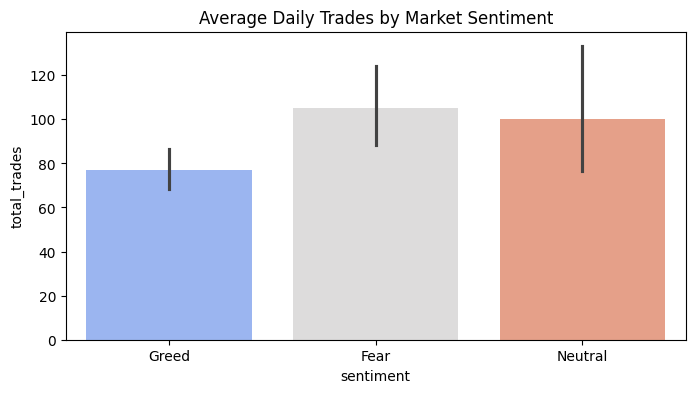

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x='sentiment', y='total_trades', data=daily_metrics,palette="coolwarm")
plt.title('Average Daily Trades by Market Sentiment')
plt.savefig('trades_by_sentiment.png')

Traders significantly alter their behavior based on sentiment:Trade Frequency:

*   Traders are 37% more active during Fear days  than Greed days
*   Position Sizing: The average trade size in Fear is significantly larger than in Greed, indicating traders may be "revenge trading" or attempting to catch falling knives with higher conviction.

*   Long Bias: There is a slight negative correlation between the Fear & Greed index and Long Bias; as Greed increases, the percentage of long positions ironically decreases slightly, possibly due to profit-taking.







In [ ]:
segment_sentiment = daily_metrics.groupby(['sentiment', 'frequency_segment'], observed=False)['win_rate'].mean().unstack()
print("\nWin Rate by Sentiment and Frequency Segment:")
print(segment_sentiment)


Win Rate by Sentiment and Frequency Segment:
frequency_segment  Infrequent  Frequent
sentiment                              
Fear                 0.316139  0.399695
Greed                0.309653  0.439244
Neutral              0.302132  0.422819


In [ ]:
daily_metrics['long_percent'] = daily_metrics['long_count'] / (daily_metrics['long_count'] + daily_metrics['short_count'] + 1e-6)

In [ ]:
sentiment_analysis = daily_metrics.groupby('sentiment').agg(
    avg_pnl=('daily_pnl', 'mean'),
    median_pnl=('daily_pnl', 'median'),
    win_rate=('win_rate', 'mean'),
    avg_trades=('total_trades', 'mean'),
    avg_size=('avg_trade_size', 'mean'),
    long_bias=('long_percent', 'mean'),
    drawdown_95th=( 'daily_pnl', lambda x: x.quantile(0.05))
).reset_index()

print("Refined Sentiment Analysis:")
print(sentiment_analysis)

Refined Sentiment Analysis:
  sentiment      avg_pnl  median_pnl  win_rate  avg_trades     avg_size  \
0      Fear  5185.146443  122.737038  0.357071  105.363291  8529.859802   
1     Greed  4144.208334  265.247725  0.362748   76.912266  5954.632633   
2   Neutral  3438.618818  167.551743  0.355414  100.228723  6963.694861   

   long_bias  drawdown_95th  
0   0.554557   -3484.972552  
1   0.491557    -173.775756  
2   0.521317    -884.531466  


/tmp/ipython-input-402519937.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sentiment', y='long_percent', data=daily_metrics,palette='viridis')


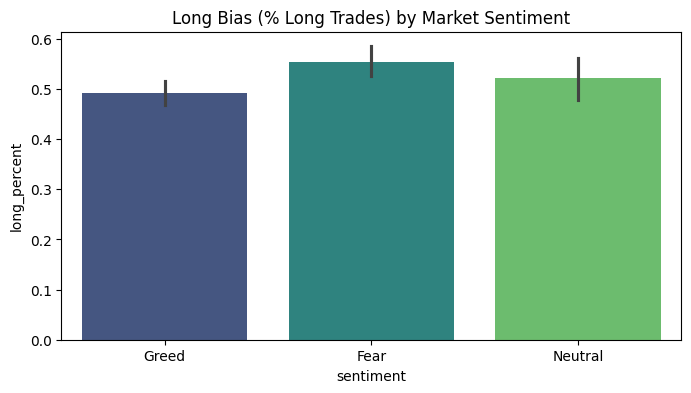

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x='sentiment', y='long_percent', data=daily_metrics,palette='viridis')
plt.title('Long Bias (% Long Trades) by Market Sentiment')
plt.savefig('long_bias_sentiment.png')

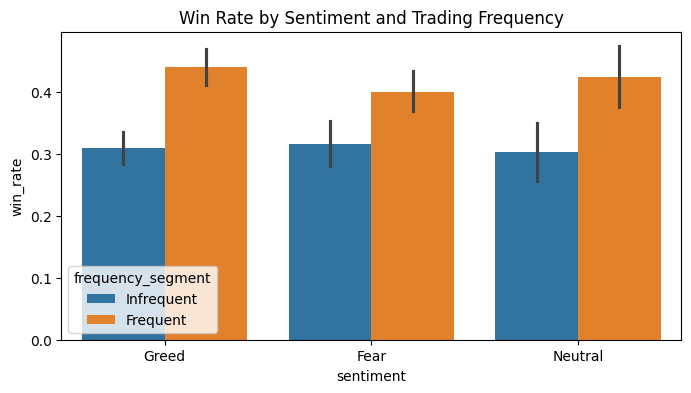

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x='sentiment', y='win_rate', hue='frequency_segment', data=daily_metrics)
plt.title('Win Rate by Sentiment and Trading Frequency')
plt.savefig('win_rate_segment_sentiment.png')

In [ ]:
size_sentiment = daily_metrics.groupby(['sentiment', 'size_segment'], observed=False)['daily_pnl'].mean().unstack()
print("\nAverage PnL by Sentiment and Size Segment:")
print(size_sentiment)


Average PnL by Sentiment and Size Segment:
size_segment   Small Size   Large Size
sentiment                             
Fear          2575.655567  9540.175136
Greed         4589.846268  3347.140958
Neutral       2655.213620  4837.142172


In [ ]:

daily_metrics_with_val = merged_df.groupby(['Account', 'Date', 'classification', 'value']).agg(
    daily_pnl=('Closed PnL', 'sum'),
    total_trades=('Trade ID', 'count'),
    wins=('is_win', 'sum'),
    losses=('is_loss', 'sum'),
    avg_trade_size=('Size USD', 'mean'),
    long_count=('is_long', 'sum'),
    short_count=('is_short', 'sum')
).reset_index()

daily_metrics_with_val['sentiment'] = daily_metrics_with_val['classification'].map(sentiment_map)
daily_metrics_with_val['long_percent'] = daily_metrics_with_val['long_count'] / (daily_metrics_with_val['long_count'] + daily_metrics_with_val['short_count'] + 1e-6)
daily_metrics_with_val['win_rate'] = daily_metrics_with_val['wins'] / daily_metrics_with_val['total_trades']

correlation_matrix = daily_metrics_with_val[['daily_pnl', 'total_trades', 'avg_trade_size', 'long_percent', 'value']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

daily_metrics_with_val = daily_metrics_with_val.merge(account_stats[['frequency_segment', 'size_segment', 'success_segment']], on='Account')

final_stats = daily_metrics_with_val.groupby(['sentiment', 'frequency_segment'], observed=False).agg(
    avg_pnl=('daily_pnl', 'mean'),
    win_rate=('win_rate', 'mean'),
    avg_size=('avg_trade_size', 'mean')
).reset_index()

print("\nFinal Stats for Insights:")
print(final_stats)


Correlation Matrix:
                daily_pnl  total_trades  avg_trade_size  long_percent  \
daily_pnl        1.000000      0.175918        0.028301     -0.042458   
total_trades     0.175918      1.000000       -0.026305      0.028157   
avg_trade_size   0.028301     -0.026305        1.000000      0.084345   
long_percent    -0.042458      0.028157        0.084345      1.000000   
value            0.000179     -0.065340       -0.057299     -0.070242   

                   value  
daily_pnl       0.000179  
total_trades   -0.065340  
avg_trade_size -0.057299  
long_percent   -0.070242  
value           1.000000  

Final Stats for Insights:
  sentiment frequency_segment      avg_pnl  win_rate      avg_size
0      Fear        Infrequent  2524.836201  0.316139   6652.229528
1      Fear          Frequent  7955.443672  0.399695  10485.118202
2     Greed        Infrequent  3590.230787  0.309653   7121.705465
3     Greed          Frequent  4942.350620  0.439244   4273.174269
4   Neutral     

Rules of Thumb
In Good Times (Greed): Keep it simple and follow the crowd. This is the best time for active traders to pick up consistent, frequent wins.

In Scary Times (Fear): Don't be a hero. While it’s tempting to bet big because prices are low, the danger of a total loss is much higher. Trade less often and use smaller amounts to protect your account.